### Import required libraries

In [63]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

###  Linear Regression- Implement linear regression model 

The given dataset is related to diamonds. It has information of carat, cut, color, clarity, depth, table, and diamond dimensions (x, y, z) and prices.The raw file contains 53,940 entries and 10 variables, where each row represents a diamond and its features mentioned above.The dataset has categorical and non categorical features. Non categorical features are carat, depth, price and table. Categorical features are cut, color, and clarity. 

In [64]:
#Reading csv file with Diamond data
df =pd.read_csv("C:/Users/29vai/diamond.csv")

#Drop row number column
df.drop(['Unnamed: 0'], axis=1, inplace= True)

### 2. Provide the main statistics about the entries of the dataset (mean, std, number of missing values, etc.)

In [65]:
#Print summary of all numeric value columns
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [66]:
## count missing values
missing_value = df.isna().sum()
print(missing_value)

x0 = (df['x'] == 0).sum()

y0 = (df['y'] == 0).sum()

z0 = (df['z'] == 0).sum()

# carat minimum value is non zero so x,y and z cant be 0.
print('missing data in x :', x0)
print('missing data in y :', y0)
print('missing data in z :', z0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
missing data in x : 8
missing data in y : 7
missing data in z : 20


Missing values in x is 8, y is 7 and z is 20. Dimensions can't be 0 if carat is non zero

In [67]:
# Drop any missing values
df.dropna(inplace=True)


In [68]:
#Data cleaning- x,y or z can't be 0 for non zero value of carat
#removing rows with zero x,y or z values

df = df[df['x'] != 0]
df = df[df['y'] != 0]
df = df[df['z'] != 0]

# Summary of all the numeric columns after data cleaning
(df.describe())

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data visualization

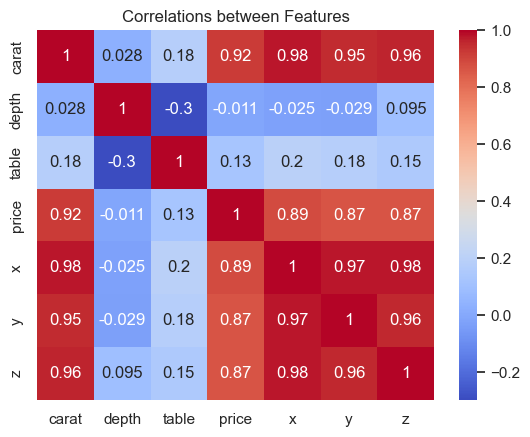

In [69]:
# Corelation matrix- to see correlations between all the numeric columns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlations between Features')
plt.show()


Carat seems very correlated price and dimension x,y and z.

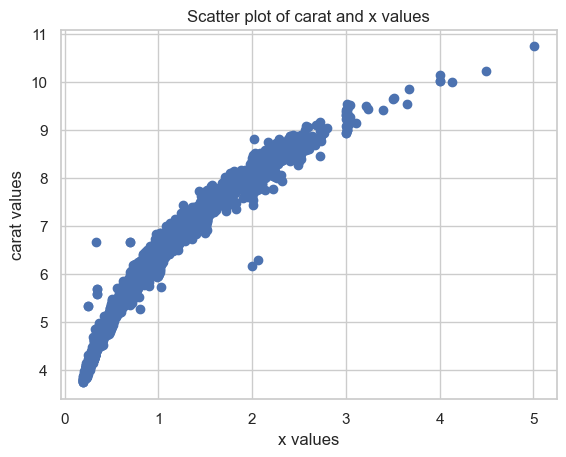

In [70]:
# Scatter plot of carat vs x values

# create scatter plot
plt.scatter(df['carat'], df['x'])

# set x and y axis labels
plt.xlabel('x values')
plt.ylabel('carat values')

# set plot title
plt.title('Scatter plot of carat and x values')

# show plot
plt.show()

Carat seems linearly dependent to x dimension. Looks like positive correlation.

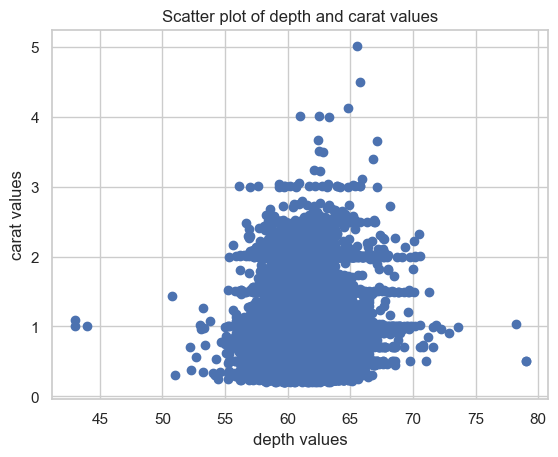

In [71]:
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(df['depth'], df['carat'])

# set x and y axis labels
plt.xlabel('depth values')
plt.ylabel('carat values')

# set plot title
plt.title('Scatter plot of depth and carat values')

# show plot
plt.show()



It seems correlation between depth and carat is less.

Text(0.5, 1.0, 'Scatter plot of color and price values')

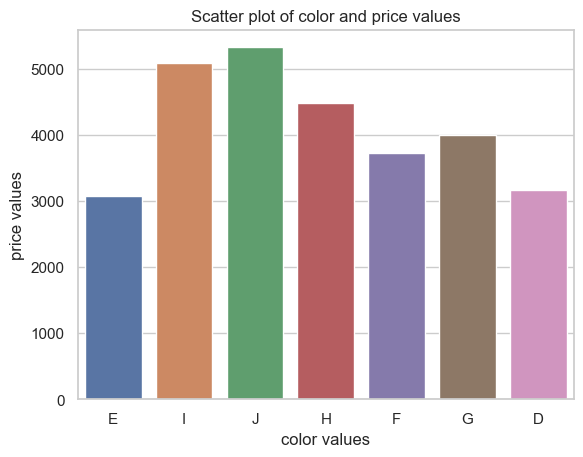

In [72]:
# Set style
sns.set(style="whitegrid")

# Create stacked bar chart
sns.barplot(x="color", y="price", data=df, ci=None)

# set x and y axis labels
plt.xlabel('color values')
plt.ylabel('price values')

# set plot title
plt.title('Scatter plot of color and price values')


Price value is different for many colors and near for some colors.

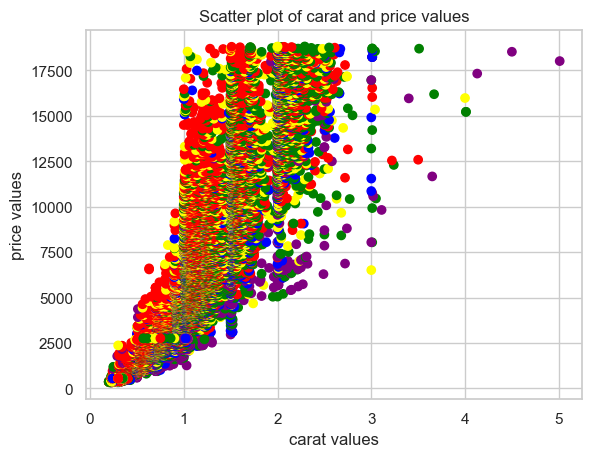

In [73]:
fig, ax = plt.subplots()

colors = {'Ideal':'red', 'Premium':'green', 'Good':'blue', 'Very Good':'yellow', 'Fair':'purple'}

ax.scatter(df['carat'], df['price'], c=df['cut'].map(colors))
# set x and y axis labels
plt.xlabel('carat values')
plt.ylabel('price values')

# set plot title
plt.title('Scatter plot of carat and price values')

# show plot
plt.show()

There is a positive correlation between carat and price value.

### Convert features with string datatype to categorical and normalize non-categorical features

In [74]:
#categorical features
columns = [ 'cut', 'color', 'clarity']
# Unique values in categorical features
for i in columns:
    print(df[i].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [75]:
# Convert string features to categorical features
df['cut'] = pd.Categorical(df['cut']).codes
df['color'] = pd.Categorical(df['color']).codes
df['clarity'] = pd.Categorical(df['clarity']).codes

In [76]:
# normalize non-categorical features
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for col in num_cols:
    max1 = df[col].max()
    min1 = df[col].min()
    df[col] = (df[col] - min1) / (max1- min1)

### For feature selection lets check correlation matrix with all the features

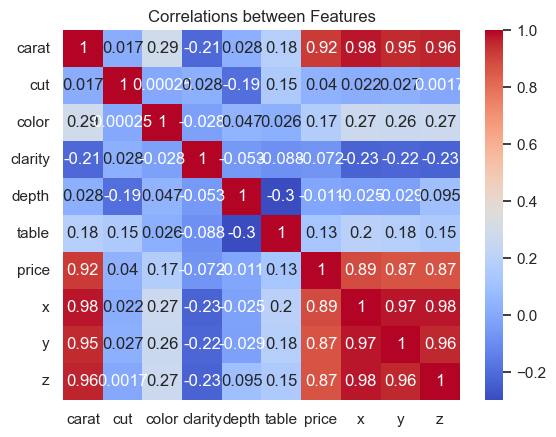

In [77]:
# Corelation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlations between Features')
plt.show()


### Target value is carat. And from the above map it is clear that price , x,y and z are highly correlated

### Data matrices for input and target created with selected features

In [78]:
# features selected
X = df.drop(["carat","cut","color","clarity","depth","table"], axis = 1)
#Traget selected
y = df["carat"].values.reshape(-1, 1)

### Dataset divided into training and test, as 80% training, 20% testing dataset

In [79]:
# Divide the dataset into training and test
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Printed the shape of your X_train, y_train, X_test, y_test

In [80]:
# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43136, 4)
y_train shape: (43136, 1)
X_test shape: (10784, 4)
y_test shape: (10784, 1)


### Calculated weights with the OLS equation

In [81]:
# Using train data to calculate weight using OLS equation
X= X_train
y = y_train

# Calculate weights using OLS equation
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
w = np.dot(np.linalg.inv(XtX), Xty)

### Pickle files with saved weights that generate the best results for your model for Part II

In [107]:
with open('model', 'wb') as file:
    pickle.dump(w, file)

### Get predictions and calculating sum of squared errors

In [82]:
#Predict target y_pred 
y_pred = np.dot(X_test, w)

# Calculate loss
loss = np.mean((y_test - y_pred)**2)


# Print predicted values and loss
print("Predicted_values: ", y_pred)
print("Loss: ", loss)

Predicted_values:  [[0.06832382]
 [0.07584065]
 [0.05135798]
 ...
 [0.11276644]
 [0.14774775]
 [0.12454315]]
Loss:  0.00017483647120750543


### Plotted predictions vs actual targets

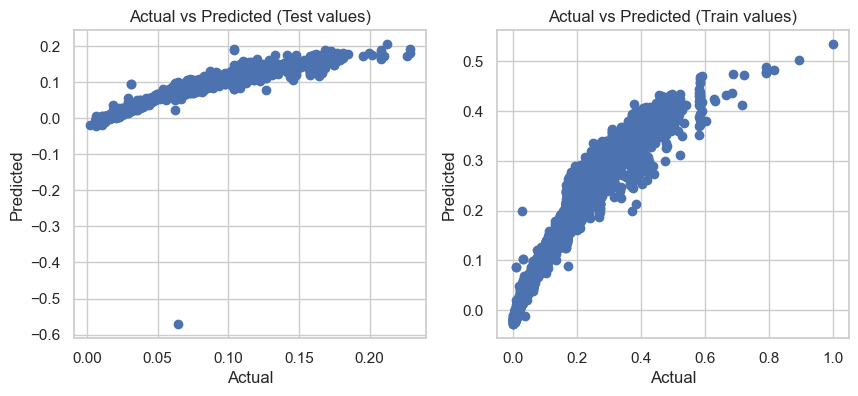

In [83]:
# Create scatter plots of actual vs predicted values

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(y_test, y_pred)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Actual vs Predicted (Test values)')

ax[1].scatter(y_train, X_train.dot(w))
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].set_title('Actual vs Predicted (Train values)')

plt.show()


#  Ridge Regression 

### Dataset selected is diamond

In [84]:
# Reading csv file to load diamond data
df1 =pd.read_csv("C:/Users/29vai/diamond.csv")

# Drop any missing values
df1.dropna(inplace=True)

#Drop column with row numbers
df1.drop(['Unnamed: 0'], axis=1, inplace= True)

#Summary of all the numeric value columns 
print(df1.describe())


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [85]:
#Data cleaning- x,y or z can't be 0 for non zero value of carat
#removing rows with zero x,y or z values
df1 = df1[df1['x'] != 0]
df1 = df1[df1['y'] != 0]
df1 = df1[df1['z'] != 0]

# Summary of all the numeric columns after data cleaning
(df1.describe())

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Convert features with string datatype to categorical and normalize non-categorical features if needed.

In [86]:
# Convert string features to categorical features
df1['cut'] = pd.Categorical(df1['cut']).codes
df1['color'] = pd.Categorical(df1['color']).codes
df1['clarity'] = pd.Categorical(df1['clarity']).codes

# normalize non-categorical features
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for col in num_cols:
    max1 = df1[col].max()
    min1 = df1[col].min()
    df1[col] = (df1[col] - min1) / (max1- min1)

### For feature selection lets check correlation matrix with all the features

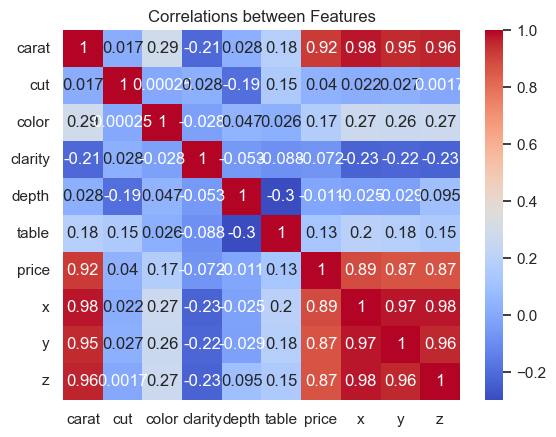

In [87]:
# Corelation matrix
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlations between Features')
plt.show()


### Target value is carat. And from the above map it is clear that x,y, z and price are  correlated with carat

In [88]:
# features selected
X1 = df1.drop(["carat","cut","color","clarity","depth","table"], axis = 1)
#Traget selected
y1 = df1["carat"].values.reshape(-1, 1)

### Dataset split into train and test

In [89]:
# Divide the dataset into training and test
train_size = int(len(df1) * 0.8)
X_train1, X_test1 = X1[:train_size], X1[train_size:]
y_train1, y_test1 = y1[:train_size], y1[train_size:]

# Print the shapes of the datasets
print("X_train shape:", X_train1.shape)
print("y_train shape:", y_train1.shape)
print("X_test shape:", X_test1.shape)
print("y_test shape:", y_test1.shape)

X_train shape: (43136, 4)
y_train shape: (43136, 1)
X_test shape: (10784, 4)
y_test shape: (10784, 1)


### Calculate weights using OLS equation for Ridge regression

In [90]:
# Calculate weights using OLS equation for Ridge regression
X1= X_train1
y1 = y_train1

# Define the hyperparameter
lambd = 0.001

XtX1 = np.dot(X1.T, X1)
Xty1 = np.dot(X1.T, y1)

S = X_train1.shape[1]
I= np.eye(S)
lambdI = lambd*I
XtX1= np.dot(X1.T, X1)
add = XtX1 + lambdI
adinv= np.linalg.inv(add)
w1 = np.dot( adinv , Xty1)
print(w1)

[[ 0.11296714]
 [ 0.5524182 ]
 [ 0.05274276]
 [-0.69213809]]


### Pickle files with saved weights that generate the best results for your model

In [106]:
with open('model1.pickle', 'wb') as file:
    pickle.dump(w1, file)

### loss calculation

In [91]:
y_pred1 = np.dot(X_test1, w1)
wTw1 = np.dot(w1.T, w1)
loss1 = np.mean((y_test1 - y_pred1)**2) + 1/2*lambd * wTw1

### Provide your loss value. Loss value 

In [92]:
print(loss1)

[[0.00057471]]


### Show the plot comparing the predictions vs the actual test data.

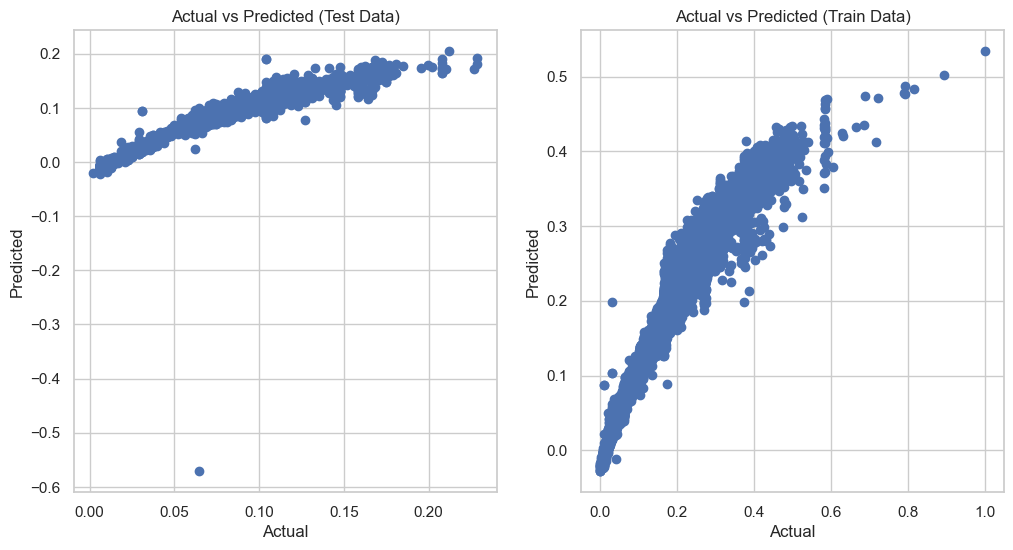

In [93]:
# Create scatter plots of actual vs predicted values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(y_test1, y_pred1)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Actual vs Predicted (Test Data)')

ax[1].scatter(y_train1, X_train1.dot(w1))
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].set_title('Actual vs Predicted (Train Data)')

plt.show()


### Elastic Net Regularization from Scratch

### Using same training and test data as used in Ridge regression

In [94]:
# using same training and test data as used in Ridge regression
X2= X_train1
y2 = y_train1
X_test2= X_test1
y_test2 = y_test1

### Calculate weights using OLS equation for Elastic Net regression

In [95]:
# Define the hyperparameters
alpha = 0.5
lambd1 = 0.001
lambd2 = 0.001

# Calculate weights using OLS equation for Elastic Net regression

# Compute the XtX and Xty matrices
XtX2 = np.dot(X2.T, X2)
Xty2 = np.dot(X2.T, y2)

# Compute the identity matrix
I = np.eye(X2.shape[1])

# Compute coefficients using Elastic Net formula
add2 = XtX2 + lambd2*I + 2*alpha*lambd1*I
adinv2 = np.linalg.inv(add2)
w2 = np.dot(adinv2, Xty2)

# Print the weights
print(w2)


[[ 0.11297356]
 [ 0.55239858]
 [ 0.05272502]
 [-0.69207052]]


### Loss calculation

In [96]:
#Predict target y_pred 
y_pred2 = np.dot(X_test2, w2)

# Compute loss

wTw2 = np.dot(w2.T, w2)
loss2 = np.mean((y_test1 - y_pred1)**2) + lambd2*wTw2 + alpha*lambd1*np.sum(np.abs(w2)) + (1-alpha)*lambd1*np.sum(w2**2)


# Print predicted values and loss
print("Predicted_values: ", y_pred2)
print("Loss: ", loss2)


Predicted_values:  [[0.06832523]
 [0.07584134]
 [0.05136074]
 ...
 [0.11276699]
 [0.14774606]
 [0.12454298]]
Loss:  [[0.00207938]]


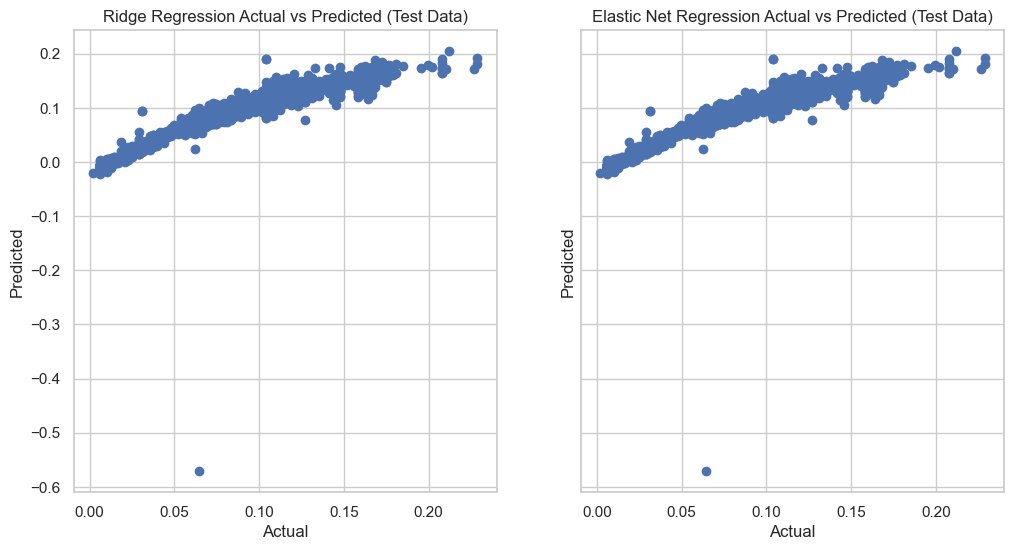

In [97]:
# Create scatter plots of actual vs predicted values
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].scatter(y_test1, y_pred1)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Ridge Regression Actual vs Predicted (Test Data)')

ax[1].scatter(y_test2, y_pred2)
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].set_title('Elastic Net Regression Actual vs Predicted (Test Data)')

plt.show()


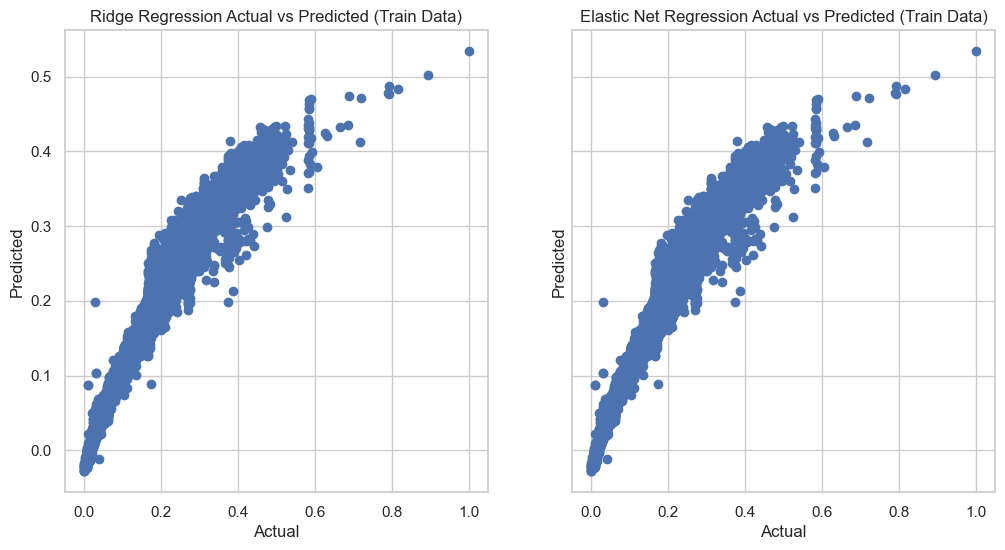

In [98]:
# Create scatter plots of actual vs predicted values
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].scatter(y_train1, X_train1.dot(w1))
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Ridge Regression Actual vs Predicted (Train Data)')

ax[1].scatter(y2, X2.dot(w2))
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].set_title('Elastic Net Regression Actual vs Predicted (Train Data)')
plt.show()

In [99]:
print('Ridge regression loss', loss1)
print('Elastic Net regression loss', loss2)
print('the loss difference between ridge regression and elastic net regression :',loss1 - loss2)

Ridge regression loss [[0.00057471]]
Elastic Net regression loss [[0.00207938]]
the loss difference between ridge regression and elastic net regression : [[-0.00150467]]
